## Fundamentals of mathematics

Let's begin by learning about the basic `SymPy` objects and the
operations we can carry out on them. We'll learn the `SymPy` equivalents
of many math verbs like &ldquo;to solve&rdquo; (an equation), &ldquo;to expand&rdquo; (an
expression), &ldquo;to factor&rdquo; (a polynomial).

### Numbers

In `Python`, there are two types of number objects: `int`s and `float`s.

In [2]:
3         # an int

In [3]:
3.0       # a float

Integer objects in `Python` are a faithful representation of the set of
integers $\mathbb{Z}=\{\ldots,-2,-1,0,1,2,\ldots\}$. Floating point numbers are
approximate representations of the reals $\mathbb{R}$. Regardless of its absolute
size, a floating point number is only accurate to 16 decimals.

Special care is required when specifying rational numbers, because
integer division might not produce the answer you want. In other
words, Python will not automatically convert the answer to a floating
point number, but instead round the answer to the closest integer:

In [4]:
1/7       # int/int gives int

To avoid this problem, you can force `float` division by using the
number `1.0` instead of `1`:

In [5]:
1.0/7     # float/int gives float

This result is better, but it's still only an approximation of the exact
number $\frac{1}{7} \in \mathbb{Q}$, since a `float` has 16 decimals while the decimal
expansion of $\frac{1}{7}$ is infinitely long. To obtain an *exact* representation
of $\frac{1}{7}$ you need to create a `SymPy` expression. You can sympify any
expression using the shortcut function `S()`:

In [6]:
S('1/7')  # = Rational(1,7)

Note the input to `S()` is specified as a text string delimited by quotes.
We could have achieved the same result using `S('1')/7` since a `SymPy`
object divided by an `int` is a `SymPy` object.

Except for the tricky `Python` division operator, other math operators
like addition `+`, subtraction `-`, and multiplication `*` work as you would
expect. The syntax `**` is used in `Python` to denote exponentiation:

In [7]:
2**10     # same as S('2^10')

When solving math problems, it's best to work with `SymPy` objects,
and wait to compute the numeric answer in the end. To obtain a
numeric approximation of a `SymPy` object as a `float`, call its `.evalf()`
method:

In [8]:
pi

In [9]:
pi.evalf()

The method `.n()` is equivalent to `.evalf()`. The global `SymPy`
function `N()` can also be used to to compute numerical values. You can
easily change the number of digits of precision of the approximation.
Enter `pi.n(400)` to obtain an approximation of $\pi$ to 400 decimals.

### Symbols

Python is a civilized language so there's no need to define variables
before assigning values to them. When you write `a = 3`, you define a
new name `a` and set it to the value `3`. You can now use the name `a`
in subsequent calculations.

Most interesting `SymPy` calculations require us to define `symbols`,
which are the `SymPy` objects for representing variables and unknowns.
For your convenience, when [live.sympy.org](http://live.sympy.org) starts, it runs the
following commands automatically:

In [10]:
from __future__ import division
from sympy import *
x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer=True)
f, g, h = symbols('f g h', cls=Function)

The first statement instructs python to convert `1/7` to `1.0/7` when
dividing, potentially saving you from any int division confusion. The
second statement imports all the `SymPy` functions. The remaining
statements define some generic symbols `x`, `y`, `z`, and `t`, and several
other symbols with special properties.

Note the difference between the following two statements:

In [11]:
x + 2            # an Add expression

In [12]:
p + 2

NameError: name 'p' is not defined

The name `x` is defined as a symbol, so `SymPy` knows that `x + 2` is an
expression; but the variable `p` is not defined, so `SymPy` doesn't know
what to make of `p + 2`. To use `p` in expressions, you must first define
it as a symbol:

In [13]:
p = Symbol('p')  # the same as p = symbols('p')
p + 2            # = Add(Symbol('p'), Integer(2))

You can define a sequence of variables using the following notation:

In [14]:
a0, a1, a2, a3 = symbols('a0:4')

You can use any name you want for a variable, but it's best if you
avoid the letters `Q,C,O,S,I,N` and `E` because they have special uses
in `SymPy`: `I` is the unit imaginary number $i \equiv \sqrt(-1)$, `E` is the base of
the natural logarithm, `S()` is the sympify function, `N()` is used to
obtain numeric approximations, and `O` is used for big-O notation.

The underscore symbol `_` is a special variable that contains the result
of the last printed value. The variable `_` is analogous to the `ans` button
on certain calculators, and is useful in multi-step calculations:

In [15]:
3+3

In [16]:
_*2

### Expresions

You define `SymPy` expressions by combining symbols with basic math
operations and other functions:

In [17]:
expr = 2*x + 3*x - sin(x) - 3*x + 42
simplify(expr)

The function `simplify` can be used on any expression to simplify
it. The examples below illustrate other useful `SymPy` functions that
correspond to common mathematical operations on expressions:

In [18]:
factor( x**2-2*x-8 )

In [19]:
expand( (x-4)*(x+2) )

In [20]:
a, b = symbols('a b')
collect(x**2 + x*b + a*x + a*b, x)  # collect terms for diff. pows of x

To substitute a given value into an expression, call the `.subs()`
method, passing in a python dictionary object `{ key:val, ... }`
with the symbol&ndash;value substitutions you want to make:

In [21]:
expr = sin(x) + cos(y)
expr

In [22]:
expr.subs({x:1, y:2})

In [23]:
expr.subs({x:1, y:2}).n()

Note how we used `.n()` to obtain the expression's numeric value.

### Solving equations

The function `solve` is the main workhorse in `SymPy`. This incredibly
powerful function knows how to solve all kinds of equations. In fact
`solve` can solve pretty much any equation! When high school students
learn about this function, they get really angry&mdash;why did they spend
five years of their life learning to solve various equations by hand,
when all along there was this `solve` thing that could do all the math
for them? Don't worry, learning math is never a waste of time.

The function `solve` takes two arguments. Use `solve(expr,var)` to
solve the equation `expr==0` for the variable `var`. You can rewrite any
equation in the form `expr==0` by moving all the terms to one side
of the equation; the solutions to $A(x) = B(x)$ are the same as the
solutions to $A(x) - B(x) = 0$.

For example, to solve the quadratic equation $x^2 + 2x - 8 = 0$, use

In [24]:
solve( x**2 + 2*x - 8, x)

In this case the equation has two solutions so `solve` returns a list.
Check that $x = 2$ and $x = -4$ satisfy the equation $x^2 + 2x - 8 = 0$.

The best part about `solve` and `SymPy` is that you can obtain symbolic
answers when solving equations. Instead of solving one specific
quadratic equation, we can solve all possible equations of the form
$ax^2 + bx + c = 0$ using the following steps:

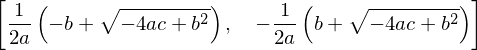

In [25]:
a, b, c = symbols('a b c')
solve( a*x**2 + b*x + c, x)

In this case `solve` calculated the solution in terms of the symbols
`a`, `b`, and `c`. You should be able to recognize the expressions in the
solution&mdash;it's the quadratic formula $x_{1,2} = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$.

To solve a specific equation like $x^2 + 2x - 8 = 0$, we can substitute
the coefficients $a = 1$, $b = 2$, and $c = -8$ into the general solution to
obtain the same result:

In [26]:
gen_sol = solve( a*x**2 + b*x + c, x)
[ gen_sol[0].subs({'a':1,'b':2,'c':-8}),
  gen_sol[1].subs({'a':1,'b':2,'c':-8}) ]

To solve a *system of equations*, you can feed `solve` with the list of
equations as the first argument, and specify the list of unknowns you
want to solve for as the second argument. For example, to solve for $x$
and $y$ in the system of equations $x + y = 3$ and $3x - 2y = 0$, use

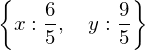

In [27]:
solve([x + y - 3, 3*x - 2*y], [x, y])

The function `solve` is like a Swiss Army knife you can use to solve
all kind of problems. Suppose you want to *complete the square* in the
expression $x^2 - 4x + 7$, that is, you want to find constants $h$ and $k$
such that $x^2 -4x + 7 = (x-h)^2 + k$. There is no special &ldquo;complete the
square&rdquo; function in `SymPy`, but you can call solve on the equation
$(x - h)^2 + k - (x^2 - 4x + 7) = 0$ to find the unknowns $h$ and $k$:

In [28]:
h, k = symbols('h k')
solve( (x-h)**2 + k - (x**2-4*x+7), [h,k] )

In [29]:
((x-2)**2+3).expand()  # so h = 2 and k = 3, verify...

Learn the basic `SymPy` commands and you'll never need to suffer
another tedious arithmetic calculation painstakingly performed by
hand again!

### Rational functions

By default, `SymPy` will not combine or split rational expressions.
You need to use `together` to symbolically calculate the addition of
fractions:

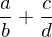

In [30]:
a, b, c, d = symbols('a b c d')
a/b + c/d

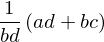

In [31]:
together(a/b + c/d)

Alternately, if you have a rational expression and want to divide the
numerator by the denominator, use the `apart` function:

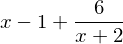

In [32]:
apart( (x**2+x+4)/(x+2) )

### Exponentials and logarithms

Euler's constant $e = 2.71828\dots$ is defined one of several ways,

$$
e \equiv \lim_{n\to\infty}\left(1+\frac{1}{n}\right)^n
  \equiv \lim_{\epsilon\to 0}(1+\epsilon)^{1/\epsilon}
  \equiv \sum_{n=0}^{\infty}\frac{1}{n!},
$$

and is denoted `E` in `SymPy`. Using `exp(x)` is equivalent to `E**x`.

The functions `log` and `ln` both compute the logarithm base $e$:

In [33]:
log(E**3)  # same as ln(E**3)

By default, `SymPy` assumes the inputs to functions like `exp` and `log` are
complex numbers, so it will not expand certain logarithmic expressions.
However, indicating to `SymPy` that the inputs are positive real numbers
will make the expansions work:

In [34]:
x, y = symbols('x y')
log(x*y).expand()

In [35]:
a, b = symbols('a b', positive=True)
log(a*b).expand()

### Polynomials

Let's define a polynomial $P$ with roots at $x = 1$, $x = 2$, and $x = 3$:

In [36]:
P = (x-1)*(x-2)*(x-3)
P

To see the expanded version of the polynomial, call its `expand` method:

In [37]:
P.expand()

When the polynomial is expressed in it's expanded form $P(x) =
x^3 - 6x^2 + 11x - 6$, we can't immediately identify its roots. This is
why the factored form $P(x) = (x - 1)(x - 2)(x - 3)$ is preferable. To
factor a polynomial, call its `factor` method or simplify it:

In [38]:
P.factor()

In [39]:
P.simplify()

Recall that the roots of the polynomial $P(x)$ are defined as the
solutions to the equation $P(x) = 0$. We can use the `solve` function
to find the roots of the polynomial:

In [40]:
roots = solve(P,x)
roots

In [41]:
# let's check if P equals (x-1)(x-2)(x-3)
simplify( P - (x-roots[0])*(x-roots[1])*(x-roots[2]) )

### Equality checking

In the last example, we used the `simplify` function to check whether
two expressions were equal. This way of checking equality works
because $P = Q$ if and only if $P - Q = 0$. This is the best way to
check if two expressions are equal in `SymPy` because it attempts all
possible simplifications when comparing the expressions. Below is
a list of other ways to check whether two quantities are equal with
example cases where they fail:

In [42]:
p = (x-5)*(x+5)
q = x**2 - 25

In [43]:
p == q                      # fail

False

In [44]:
p - q == 0                  # fail

False

In [45]:
simplify(p - q) == 0

True

In [46]:
sin(x)**2 + cos(x)**2 == 1  # fail

False

In [47]:
simplify( sin(x)**2 + cos(x)**2 - 1) == 0

True

### Trigonometry

The trigonometric functions `sin` and `cos` take inputs in radians:

In [48]:
sin(pi/6)

In [49]:
cos(pi/6)

For angles in degrees, you need a conversion factor of $\frac{\pi}{180}$[rad/$^\circ$]:

In [50]:
sin(30*pi/180)  # 30 deg = pi/6 rads

The inverse trigonometric functions $\sin^{-1}(x) \equiv \arcsin(x)$ and
$\cos^{-1}(x) \equiv \arccos(x)$ are used as follows:

In [51]:
asin(1/2)

In [52]:
acos(sqrt(3)/2)

Recall that $\tan(x) \equiv \frac{\sin(x)}{\cos(x)}$. The inverse function of $\tan(x)$ is $\tan^{-1}(x) \equiv \arctan(x) \equiv$ `atan(x)`

In [53]:
tan(pi/6)

In [54]:
atan( 1/sqrt(3) )

The function `acos` returns angles in the range $[0, \pi]$, while `asin` and
`atan` return angles in the range $[-\frac{\pi}{2},\frac{\pi}{2}]$.

Here are some trigonometric identities that `SymPy` knows:

In [55]:
sin(x) == cos(x - pi/2)

True

In [56]:
simplify( sin(x)*cos(y)+cos(x)*sin(y) )

In [57]:
e = 2*sin(x)**2 + 2*cos(x)**2
trigsimp(e)

In [58]:
trigsimp(log(e))

In [59]:
trigsimp(log(e), deep=True)

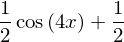

In [60]:
simplify(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4)

The function `trigsimp` does essentially the same job as `simplify`.

If instead of simplifying you want to expand a trig expression, you
should use `expand_trig`, because the default `expand` won't touch trig
functions:

In [61]:
expand(sin(2*x))       # = (sin(2*x)).expand()

In [62]:
expand_trig(sin(2*x))  # = (sin(2*x)).expand(trig=True)

### Hyperbolic trigonometric functions

The hyperbolic sine and cosine in `SymPy` are denoted `sinh` and `cosh`
respectively and `SymPy` is smart enough to recognize them when
simplifying expressions:

In [63]:
simplify( (exp(x)+exp(-x))/2 )

In [64]:
simplify( (exp(x)-exp(-x))/2 )

Recall that $x = \cosh(\mu)$ and $y = \sinh(\mu)$ are defined as $x$ and $y$
coordinates of a point on the the hyperbola with equation $x^2 - y^2 = 1$
and therefore satisfy the identity $\cosh^2 x - \sinh^2 x = 1$:

In [65]:
simplify( cosh(x)**2 - sinh(x)**2 )